<a href="https://colab.research.google.com/github/Roger-Quinelato/Titanic_ML/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install ipython

test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [121]:
test_df = pd.DataFrame(test)
train_df = pd.DataFrame(train)

In [122]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




---



**CONTAGEM DE VALORES NULOS**

In [124]:
test_df.isnull().sum()
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**OBS:** Como é menor que 20% vou imputar a média para os valores ausentes na coluna idade.

**IMPUTAÇÃO DA MÉDIA EM 'AGE'**

In [125]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [126]:
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])



---



**MAPEAMENTO DE VALORES E CONVERSÃO PARA INTEIRO**

In [127]:
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})



---



**ARREDONDAMENTO DAS IDADES**

In [128]:
train_df['Age'] = train_df['Age'].round(0)
test_df['Age'] = test_df['Age'].round(0)



---



**GRÁFICOS**

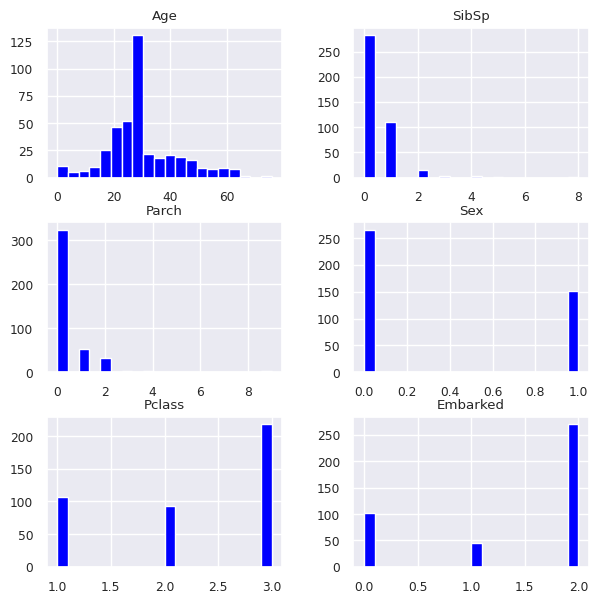

In [129]:
colunas_hist = ['Age', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']
sns.set(font_scale=0.8, rc={'figure.figsize': (7,7)})
eixo = test_df[colunas_hist].hist(bins=20, color='blue')

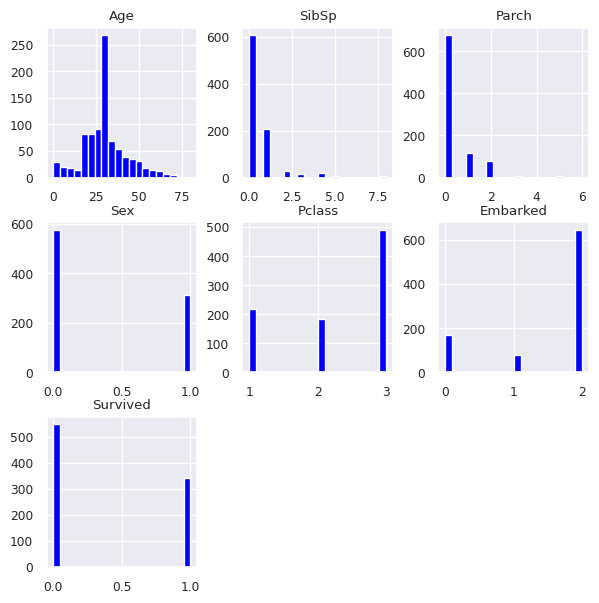

In [130]:
colunas_hist_2 = ['Age', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked', 'Survived']
sns.set(font_scale=0.8, rc={'figure.figsize': (7,7)})
eixo = train_df[colunas_hist_2].hist(bins=20, color='blue')

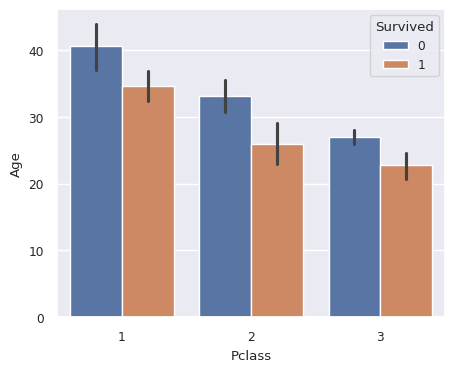

In [131]:
plt.figure(figsize=(5,4))
sns.barplot(data = train_df, x= 'Pclass', y= 'Age', hue = 'Survived')
plt.show()

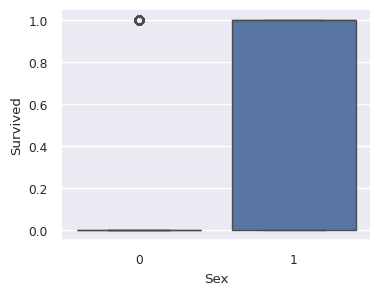

In [132]:
plt.figure(figsize=(4,3))
sns.boxplot(data = train_df, x=train_df['Sex'], y=train_df['Survived'])
plt.show()

**DROP DAS COLUNAS QUE ACREDITO QUE NÃO INFLUENCIAM**

In [133]:
test_df.drop(columns=['Name', 'Cabin', 'Ticket','Fare'], axis=1, inplace=True)
train_df.drop(columns=['Name', 'Cabin', 'Ticket','Fare'], axis=1, inplace=True)



---



**DETECÇÃO DE OUTLIERS PELO GRÁFICO**

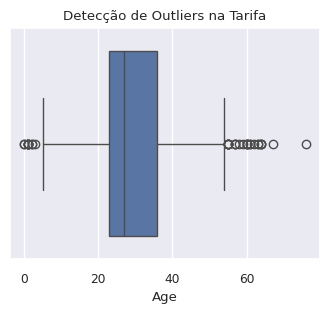

In [134]:
plt.figure(figsize=(4,3))
sns.boxplot(x=test_df['Age'])
plt.title("Detecção de Outliers na Tarifa")
plt.show()

**DETECTANDO E CONTANDO OS OUTLIERS**

In [135]:
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < lim_inf) | (df[coluna] > lim_sup)]
    contagem = outliers.shape[0]

    print(f"Quantidade de outliers na coluna '{coluna}': {contagem}")
    return outliers


outliers_Age = detectar_outliers_iqr(train_df, 'Age')


Quantidade de outliers na coluna 'Age': 66




---



**REARRUMAÇÃO DAS COLUNAS**

In [136]:
train_df = train_df[['PassengerId','Age', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked','Survived']]
test_df = test_df[['PassengerId','Age', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']]



---



**DIVISÃO DO DF DE TREINO**

In [137]:
from sklearn.model_selection import train_test_split

X = train_df[['Age', 'Parch', 'Sex', 'Pclass', 'Embarked']].values
y = train_df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)


In [138]:
from sklearn.linear_model import LogisticRegression


funcaoLogistica = LogisticRegression()
funcaoLogistica.fit(X_train, y_train)

LogisticRegression()

In [139]:
previsoes = funcaoLogistica.predict(X_test)
from sklearn.metrics import accuracy_score
print("Acurácia:", accuracy_score(y_test, previsoes))

Acurácia: 0.7982062780269058


In [140]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1])

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsoes))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       136
           1       0.77      0.69      0.73        87

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [142]:
X_test = test_df[['Age', 'Parch', 'Sex', 'Pclass', 'Embarked']].values
y_test_pred = funcaoLogistica.predict(X_test)
print(y_test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 0]
